# Convolution Nets for MNIST

In [1]:
#Import the required libraries
import numpy as np
import tensorflow as tf

################Note that we are using tf.keras, not keras!#####################################
import tensorflow.keras as keras

from keras.datasets import mnist

/Users/jeonseo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [3]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [4]:
import pandas as pd
from tensorflow.keras.optimizers import SGD

## Loading Data

In [5]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### 60000 observations / 28 width /  28 height

In [6]:
X_train.shape

(60000, 28, 28)

## Data Preparation

### The number of metrices 

In [8]:
from tensorflow.keras import backend as K

In [10]:
# Doing some prep for image data example here

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

print(shape_ord)  # Height, Width, and Depth of input image data (last one: channel?)

(28, 28, 1)


#### Preprocess and Normalise Data

### shape[0] = the number of observations 

In [27]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32') # set numeric type
X_test = X_test.astype('float32')

print(np.amax(X_train)) # lets convert the pixel data to a proportion between zero and 1
28, 28
X_train /= 255 # /= takes X_train and divides by 255
X_test /= 255  # /= takes X_test and divides by 255

0.003921569


In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # samples, N for obs. rows, N for obs. cols
                                                                 # and nmbr of channels


(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [25]:
X_train.max()

0.003921569

In [29]:
# Converting the classes to its binary categorical form (i.e.-one hot encoding, so its in a structure keras accepts)
# nb_classes = 10
# Y_train = 28, 28(y_train)
# Y_test = pd.get_dummies(y_test)

# Y_train.shape
# Y_test.shape

nb_classes = 10
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

print(Y_train.shape)
print(Y_test.shape)


(60000, 10)
(10000, 10)


# A simple CNN

In [30]:
# -- Initializing the values for the convolution neural network
# Setting up convolutional layer with 32 filters that are 3 by 3

nb_epoch = 5  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling (2 by 2)
nb_pool = 2
# convolution kernel/filter size (3 by 3)
nb_conv = 3

# Vanilla SGD to speed up optimization for example
sgd = SGD(learning_rate=0.1)

In [31]:
shape_ord

(28, 28, 1)

#### Step 1: Model Definition

### 32: the number of filters /// (3,3): the size of the filter

In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='valid', # could also add strides=2, default is 1
                 input_shape=(28,28,1))) # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax')) #could have set this up using sigmoid and included final Dense(1) layer rather than Dense(2)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                216330    
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step 2: Compile

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

#### Step 3: Fit

In [35]:
hist = model.fit(X_train, Y_train, batch_size=batch_size,
                 epochs=nb_epoch, verbose=1,
                 validation_split=.2)

Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 2.3014 - accuracy: 0.1126 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 2/5
750/750 [==============================] - 6s 8ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 6s 8ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/5
750/750 [==============================] - 6s 8ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060


### Let's plot our model Predictions!

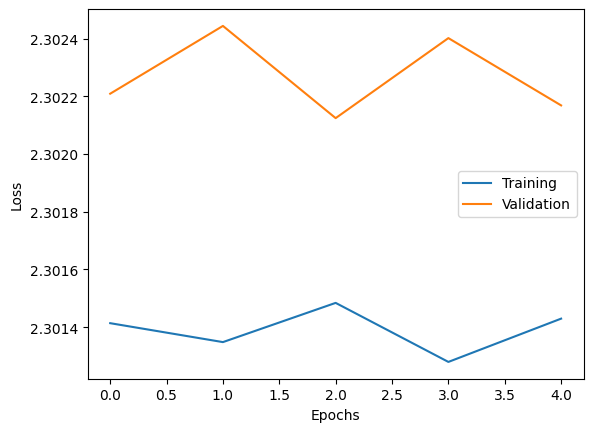

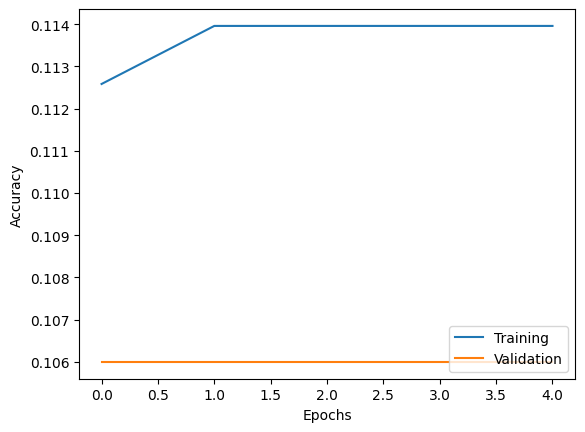

In [36]:
#plot loss and accuracy at each epoch
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

### Step 4: Evaluate

In [38]:
print('Available Metrics in Model: {}'.format(model.metrics_names))

Available Metrics in Model: ['loss', 'accuracy']


In [37]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 2.3012888431549072
Test Accuracy: 0.11349999904632568


# Adding more Dense Layers

In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.4840 - accuracy: 0.8740 - val_loss: 0.2564 - val_accuracy: 0.9261
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2293 - accuracy: 0.9331 - val_loss: 0.1843 - val_accuracy: 0.9470
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1797 - accuracy: 0.9477 - val_loss: 0.1660 - val_accuracy: 0.9517
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1493 - accuracy: 0.9564 - val_loss: 0.1437 - val_accuracy: 0.9586
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.1198 - val_accuracy: 0.9649


In [ ]:
#Evaluating the model on the test data
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.11980891227722168
Test accuracy: 0.964900016784668


# Adding more Convolution Layers and Max Pooling

---



### Process: 
### Input --> Covc1 --> Poo1 --> Conv2 --> Pool2 --> Fully connected (hidden layers) --> Softmax

In [ ]:
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size,
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 5s 5ms/step - loss: 0.8079 - accuracy: 0.7655 - val_loss: 0.2627 - val_accuracy: 0.9230
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2088 - accuracy: 0.9383 - val_loss: 0.1456 - val_accuracy: 0.9586
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1454 - accuracy: 0.9568 - val_loss: 0.1270 - val_accuracy: 0.9600
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1156 - accuracy: 0.9651 - val_loss: 0.1001 - val_accuracy: 0.9694
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0989 - accuracy: 0.9701 - val_loss: 0.0962 - val_accuracy: 0.9712


In [ ]:
#Evaluating the model on the test data
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

# Exercise

The above code has been written as a function.

Change some of the **hyperparameters** and see what happens.

In [ ]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

def build_model():
    """"""
    model = Sequential()
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                     padding='valid',
                     input_shape=shape_ord))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size,
              epochs=nb_epoch,verbose=1,
              validation_data=(X_test, Y_test))


    #Evaluating the model on the test data
    score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score)
    print('Test accuracy:', accuracy)

In [ ]:
#Timing how long it takes to build the model and test it.
%timeit -n1 -r1 build_model() # time a single loop of the model in the function.

In [ ]:
model.save("hand_written_digits_keras.h5") # save model to single HDF5 file

In [ ]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
modelload = load_model("hand_written_digits_keras.h5")

In [ ]:
from skimage import io
from skimage.transform import rescale,resize
import numpy
from skimage.color import rgb2gray
image_file_type="jpg"

img = io.imread("img_2.jpg")

fixed_size=(32,32)
#img=reshape(img,-1)
resized_image=resize(img, fixed_size) #reshaping image

resized_image.shape


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


fixed_size=(28,28)

def load_image(img_path, fixed_size,show=False):
    img = image.load_img(img_path, target_size=fixed_size,color_mode='grayscale')
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)
             # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = (img_tensor-1/(255-1)     # models expect values between 0,1
    return img_tensor


# load model
modelload = load_model("hand_written_digits_keras.h5")

# image path
img_path = 'img_2.jpg'

# load a single image
new_image = load_image(img_path, fixed_size)

# check prediction
modelload.predict_classes(new_image)

In [ ]:
# What would color image preprocessing look like?

# Import image, load to array of shape height, width, channels, then min/max transform.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img


In [ ]:

# read in all images from filenames

preprocessed_image_data=list(map(load_image, listoffilepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

---